# Saayam for All - Beneficiary Analytics

## Project Overview
This notebook analyzes key metrics for Saayam for All beneficiaries:
1. Count help requests by time period (7 days, month, year, custom range)
2. Breakdown requests by country and region
3. Breakdown requests by category
4. Count beneficiaries by time period


## 1. Setup and Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
random.seed(42)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Generate Synthetic Dataset

Creating realistic synthetic data for:
- **500 help requests** spanning the last year
- **200 beneficiaries** registered over the last year

In [ ]:
# Define data parameters
categories = ['Food', 'Medical', 'Education', 'Housing', 'Financial']
countries = ['India', 'Bangladesh', 'Nepal', 'Sri Lanka']
regions = ['North', 'South', 'East', 'West', 'Central']

# Generate help requests
requests = []
end_date = datetime.now()

for i in range(500):
    date = end_date - timedelta(days=random.randint(0, 365))
    requests.append({
        'request_id': f'R{i+1:03d}',
        'date': date,
        'country': random.choice(countries),
        'region': random.choice(regions),
        'category': random.choice(categories)
    })

df_requests = pd.DataFrame(requests)

# Generate beneficiaries
beneficiaries = []
for i in range(200):
    reg_date = end_date - timedelta(days=random.randint(0, 365))
    beneficiaries.append({
        'beneficiary_id': f'B{i+1:03d}',
        'registration_date': reg_date,
        'country': random.choice(countries)
    })

df_beneficiaries = pd.DataFrame(beneficiaries)

print("✓ Synthetic data generated successfully")
print(f"  - Help Requests: {len(df_requests)} records")
print(f"  - Beneficiaries: {len(df_beneficiaries)} records")

✓ Synthetic data generated successfully
  - Help Requests: 500 records
  - Beneficiaries: 200 records


### Save Data to CSV Files

In [ ]:
# Save to CSV
df_requests.to_csv('help_requests.csv', index=False)
df_beneficiaries.to_csv('beneficiaries.csv', index=False)

print("✓ Data saved to CSV files:")
print("  - help_requests.csv")
print("  - beneficiaries.csv")

✓ Data saved to CSV files:
  - help_requests.csv
  - beneficiaries.csv


### Preview the Data

In [ ]:
print("Help Requests Sample:")
display(df_requests.head())

print("\nBeneficiaries Sample:")
display(df_beneficiaries.head())

Help Requests Sample:


,request_id,date,country,region,category
0,R001,2024-11-28 20:23:05.525850,India,North,Education
1,R002,2025-06-18 20:23:05.525850,Bangladesh,South,Food
2,R003,2024-11-09 20:23:05.525850,India,Central,Housing
3,R004,2025-10-05 20:23:05.525850,India,North,Medical
4,R005,2025-06-24 20:23:05.525850,India,Central,Medical



Beneficiaries Sample:


,beneficiary_id,registration_date,country
0,B001,2025-06-17 20:23:05.525850,Bangladesh
1,B002,2025-09-02 20:23:05.525850,India
2,B003,2025-05-26 20:23:05.525850,Sri Lanka
3,B004,2024-12-10 20:23:05.525850,Sri Lanka
4,B005,2025-06-16 20:23:05.525850,Bangladesh


## 3. Data Analysis

### 3.1 Metric 1: Count Help Requests by Time Period

In [ ]:
# Convert date columns
df_requests['date'] = pd.to_datetime(df_requests['date'])
df_beneficiaries['registration_date'] = pd.to_datetime(df_beneficiaries['registration_date'])

now = datetime.now()

# Count requests by period
last_7_days = df_requests[df_requests['date'] >= now - timedelta(days=7)]
last_month = df_requests[df_requests['date'] >= now - timedelta(days=30)]
last_year = df_requests[df_requests['date'] >= now - timedelta(days=365)]

print("=" * 60)
print("HELP REQUESTS BY TIME PERIOD")
print("=" * 60)
print(f"Last 7 days:   {len(last_7_days):4d} requests")
print(f"Last month:    {len(last_month):4d} requests")
print(f"Last year:     {len(last_year):4d} requests")
print(f"Total:         {len(df_requests):4d} requests")
print("=" * 60)

HELP REQUESTS BY TIME PERIOD
Last 7 days:      8 requests
Last month:      37 requests
Last year:      498 requests
Total:          500 requests


### 3.2 Metric 2: Breakdown by Country and Region

In [ ]:
print("\n" + "=" * 60)
print("REQUESTS BY COUNTRY")
print("=" * 60)
country_counts = df_requests['country'].value_counts()
for country, count in country_counts.items():
    percentage = (count / len(df_requests)) * 100
    print(f"{country:15s} {count:4d} requests ({percentage:5.2f}%)")

print("\n" + "=" * 60)
print("REQUESTS BY REGION (Top 10)")
print("=" * 60)
region_counts = df_requests.groupby(['country', 'region']).size().sort_values(ascending=False).head(10)
for (country, region), count in region_counts.items():
    print(f"{country} - {region:10s} {count:4d} requests")
print("=" * 60)


REQUESTS BY COUNTRY
India            138 requests (27.60%)
Sri Lanka        125 requests (25.00%)
Nepal            123 requests (24.60%)
Bangladesh       114 requests (22.80%)

REQUESTS BY REGION (Top 10)
India - East         32 requests
Nepal - West         31 requests
India - Central      30 requests
Bangladesh - East         30 requests
Nepal - North        29 requests
Sri Lanka - West         28 requests
India - North        28 requests
Sri Lanka - Central      27 requests
Sri Lanka - East         26 requests
Nepal - South        26 requests


### 3.3 Metric 3: Breakdown by Category

In [ ]:
print("\n" + "=" * 60)
print("REQUESTS BY CATEGORY")
print("=" * 60)
category_counts = df_requests['category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df_requests)) * 100
    print(f"{category:15s} {count:4d} requests ({percentage:5.2f}%)")
print("=" * 60)


REQUESTS BY CATEGORY
Medical          106 requests (21.20%)
Education        103 requests (20.60%)
Housing          102 requests (20.40%)
Financial        100 requests (20.00%)
Food              89 requests (17.80%)


### 3.4 Metric 4: Count Beneficiaries by Time Period

In [ ]:
ben_7_days = df_beneficiaries[df_beneficiaries['registration_date'] >= now - timedelta(days=7)]
ben_month = df_beneficiaries[df_beneficiaries['registration_date'] >= now - timedelta(days=30)]
ben_year = df_beneficiaries[df_beneficiaries['registration_date'] >= now - timedelta(days=365)]

print("\n" + "=" * 60)
print("BENEFICIARIES REGISTERED BY TIME PERIOD")
print("=" * 60)
print(f"Last 7 days:   {len(ben_7_days):4d} beneficiaries")
print(f"Last month:    {len(ben_month):4d} beneficiaries")
print(f"Last year:     {len(ben_year):4d} beneficiaries")
print(f"Total:         {len(df_beneficiaries):4d} beneficiaries")
print("=" * 60)


BENEFICIARIES REGISTERED BY TIME PERIOD
Last 7 days:      1 beneficiaries
Last month:      15 beneficiaries
Last year:      199 beneficiaries
Total:          200 beneficiaries


## 4. Data Visualizations

### 4.1 Complete Analytics Dashboard

✓ Dashboard saved as 'analytics_dashboard.png'


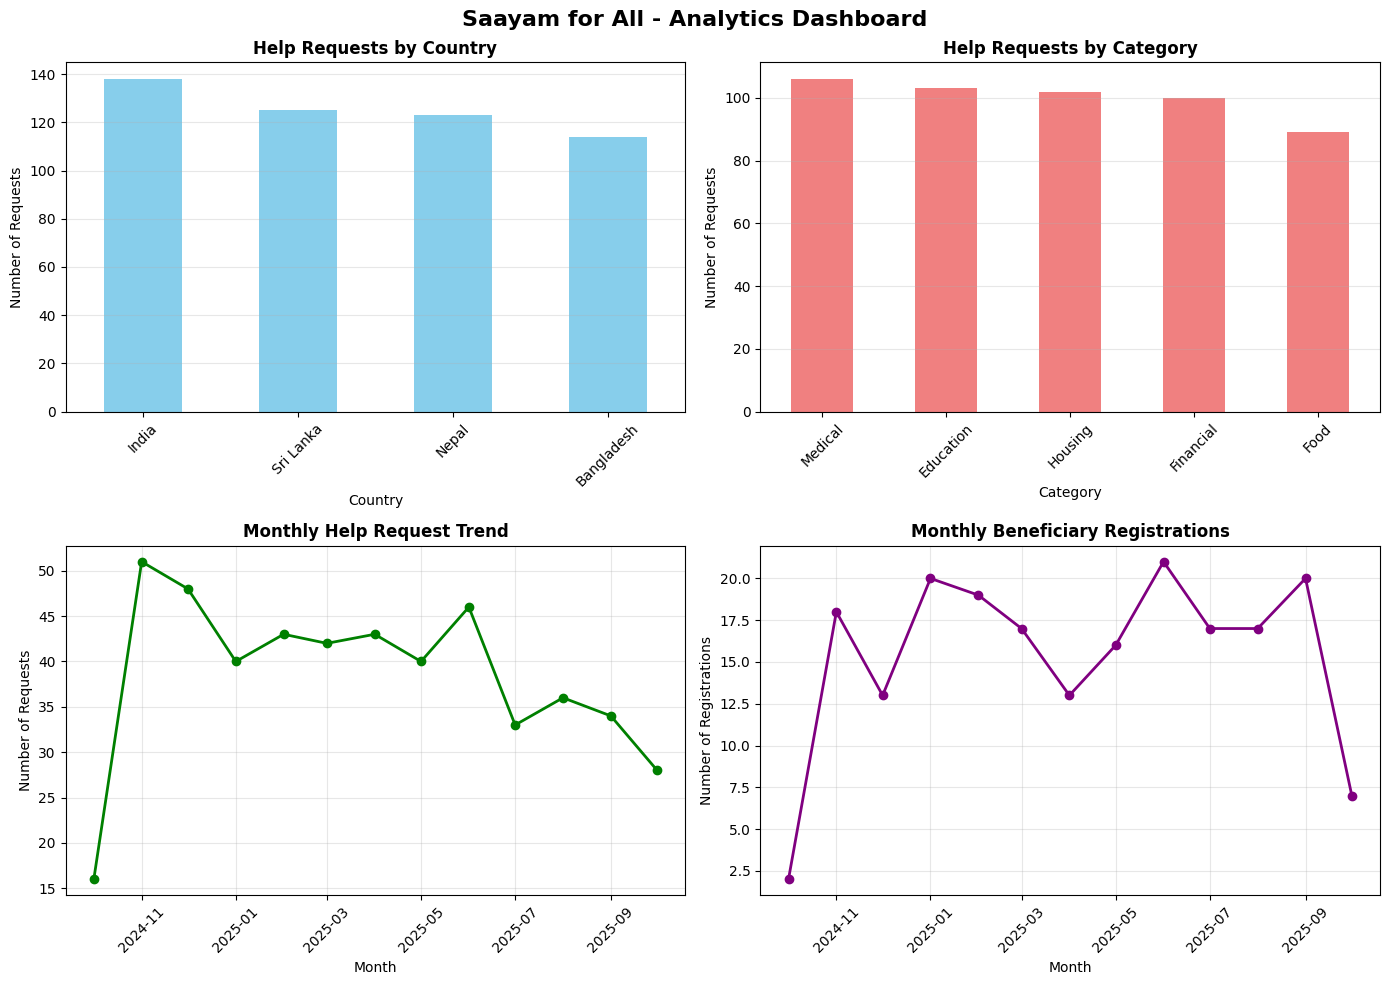

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Saayam for All - Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Requests by Country
country_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Help Requests by Country', fontweight='bold')
axes[0,0].set_xlabel('Country')
axes[0,0].set_ylabel('Number of Requests')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# 2. Requests by Category
category_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Help Requests by Category', fontweight='bold')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Number of Requests')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Monthly Request Trend
df_requests['month'] = df_requests['date'].dt.to_period('M')
monthly_trend = df_requests.groupby('month').size()
monthly_trend.index = monthly_trend.index.to_timestamp()
axes[1,0].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, color='green')
axes[1,0].set_title('Monthly Help Request Trend', fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Requests')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Monthly Beneficiary Registrations
df_beneficiaries['month'] = df_beneficiaries['registration_date'].dt.to_period('M')
ben_trend = df_beneficiaries.groupby('month').size()
ben_trend.index = ben_trend.index.to_timestamp()
axes[1,1].plot(ben_trend.index, ben_trend.values, marker='o', linewidth=2, color='purple')
axes[1,1].set_title('Monthly Beneficiary Registrations', fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Registrations')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analytics_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Dashboard saved as 'analytics_dashboard.png'")
plt.show()

## 5. Summary Statistics

In [ ]:
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)

# Request statistics
daily_requests = df_requests.groupby(df_requests['date'].dt.date).size()
print(f"\nDaily Requests:")
print(f"  Average: {daily_requests.mean():.2f}")
print(f"  Maximum: {daily_requests.max()}")
print(f"  Minimum: {daily_requests.min()}")

# Beneficiary statistics
daily_registrations = df_beneficiaries.groupby(df_beneficiaries['registration_date'].dt.date).size()
print(f"\nDaily Beneficiary Registrations:")
print(f"  Average: {daily_registrations.mean():.2f}")
print(f"  Maximum: {daily_registrations.max()}")
print(f"  Minimum: {daily_registrations.min()}")

print("\n" + "=" * 60)
print("✓ ANALYSIS COMPLETE")
print("=" * 60)


SUMMARY STATISTICS

Daily Requests:
  Average: 1.85
  Maximum: 5
  Minimum: 1

Daily Beneficiary Registrations:
  Average: 1.30
  Maximum: 3
  Minimum: 1

✓ ANALYSIS COMPLETE
